<a href="https://colab.research.google.com/github/farnazmnz/Time-Series-Forecasting/blob/main/2_demand_garanti_fact_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_excel('data_demand_garanti_fact_stock.xlsx')

In [ ]:
data

,Unnamed: 0,Date_x,GDS_x,PLN_GROUP_x,QUALITY_F_x,DES_EN_x,YYMM_x,Date & GDS & PLN,Demand,QTY_GARANTY_S,INVENTORY_QTY
0,0,28,16201007,BP,GS,SBS,140007,GS-16201007-140007-BP,35802,329,71733
1,1,28,16201007,BP,GS,SBS,140206,GS-16201007-140206-BP,58964,134,38297
2,2,28,16201007,BP,GS,SBS,140205,GS-16201007-140205-BP,57489,493,44956
3,3,28,16201007,BP,GS,SBS,140204,GS-16201007-140204-BP,58544,475,19138
4,4,28,16201007,BP,GS,SBS,140203,GS-16201007-140203-BP,74039,461,29285
...,...,...,...,...,...,...,...,...,...,...,...
267,267,102,2705004,BP,OEM,SBS,140012,OEM-2705004-140012-BP,9587,543,18682
268,268,102,2705004,BP,OEM,SBS,140101,OEM-2705004-140101-BP,8587,594,8520
269,269,102,2705004,BP,OEM,SBS,140007,OEM-2705004-140007-BP,7667,512,10396
270,270,102,2705004,BP,OEM,SBS,140102,OEM-2705004-140102-BP,1109,732,1854


In [ ]:
data['Date_x'].value_counts()

Date_x
35     30
50     30
56     30
68     30
102    30
57     29
28     28
85     28
49     27
41      9
103     1
Name: count, dtype: int64

In [ ]:
dfs = {}

for i in range(0, 103):
    dfs[i] = data[data['Date_x'] == i]

In [ ]:
dfs[35] = dfs[35].sort_values(by='YYMM_x', ascending=True)

In [ ]:
df = dfs[68]

In [ ]:
df = df.drop(columns=['Unnamed: 0' ,'Date_x' ,'GDS_x' ,'PLN_GROUP_x' ,'QUALITY_F_x' ,'DES_EN_x' ,'YYMM_x', 'Date & GDS & PLN'])

In [ ]:
df

,Demand,QTY_GARANTY_S,INVENTORY_QTY
183,11958,473,51353
184,19585,391,40055
185,17781,219,16979
186,15986,359,37015
187,17869,237,30731
188,16930,379,6488
189,12685,493,7435
190,14163,134,33872
191,8303,475,3180
192,13709,519,65296


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

### LSTM

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from keras.layers import BatchNormalization, Activation
from keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

In [ ]:
df_lstm = df.copy()

In [ ]:
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df_lstm[['QTY_GARANTY_S', 'INVENTORY_QTY', 'Demand']])


window_size = 5

def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size, :-1])
        y.append(data[i+window_size, -1])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_features, window_size)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_lstm = Sequential()
model_lstm.add(LSTM(units=128, return_sequences=True, input_shape=(window_size, X_train.shape[2])))
model_lstm.add(BatchNormalization())
model_lstm.add(LSTM(units=64, return_sequences=True))
model_lstm.add(BatchNormalization())
model_lstm.add(LSTM(units=32))
model_lstm.add(Dense(units=1, kernel_regularizer=l2(0.001)))
model_lstm.add(Activation('linear'))

model_lstm.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

model_lstm.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# Evaluate the model
mse = model_lstm.evaluate(X_test, y_test, verbose=0)
print(f'Mean Squared Error on test set: {mse}')




Epoch 1/20


C:\Users\IDS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - loss: 0.4460
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.1564
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0878
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 0.0782
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0706
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0597
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.0548
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 0.0554
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0535
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0483
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0445
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0434
Epoch 13/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0427
Epoch 14/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.0410
Epoch 15/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0390
Epoch 16/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/

In [ ]:
predictions = model_lstm.predict(X_test)

predicted_values = scaler.inverse_transform(np.concatenate((X_test[:, -1, :], predictions), axis=1))

predictions = predicted_values[:, -1]



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [ ]:
def predict_next_12(model, initial_input, steps=12):
    current_input = initial_input.copy()
    predictions = []
    for _ in range(steps):
        next_pred = model.predict(current_input.reshape(1, window_size, 2))
        predictions.append(next_pred[0][0])
        current_input = np.roll(current_input, -1, axis=0)
        current_input[-1, -1] = next_pred[0][0]
    return predictions

initial_input = scaled_features[-window_size:, :-1]

predictions_next_12 = predict_next_12(model_lstm, initial_input)

expanded_initial_input = np.repeat(initial_input[-1:], repeats=12, axis=0)

combined_array = np.hstack((expanded_initial_input, np.array(predictions_next_12).reshape(-1, 1)))

predicted_values_next_12 = scaler.inverse_transform(combined_array)

predicted_demand_next_12 = predicted_values_next_12[:, -1]

print("Predicted values for the next 12 steps:")
print(predicted_demand_next_12)



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 695ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted values for the next 12 steps:
[7357.01122226 7333.00166577 7328.31035212 7330.17408586 7321.50373417
 7349.57192163 7334.93595703 7336.53695284 7340.89019953 7321.05348583
 7349.5915153  7334.93859659]


In [ ]:
df_to_append = pd.DataFrame(columns=df_lstm.columns)
df_to_append['Demand'] = predicted_demand_next_12
for column in df_to_append.columns:
    if column != 'Demand':
        df_to_append[column] = 0
df_lstm = pd.concat([df_lstm, df_to_append], ignore_index=True)

In [ ]:
df_lstm

,Demand,QTY_GARANTY_S,INVENTORY_QTY
0,11958.000000,473,51353
1,19585.000000,391,40055
2,17781.000000,219,16979
3,15986.000000,359,37015
4,17869.000000,237,30731
5,16930.000000,379,6488
6,12685.000000,493,7435
7,14163.000000,134,33872
8,8303.000000,475,3180
9,13709.000000,519,65296


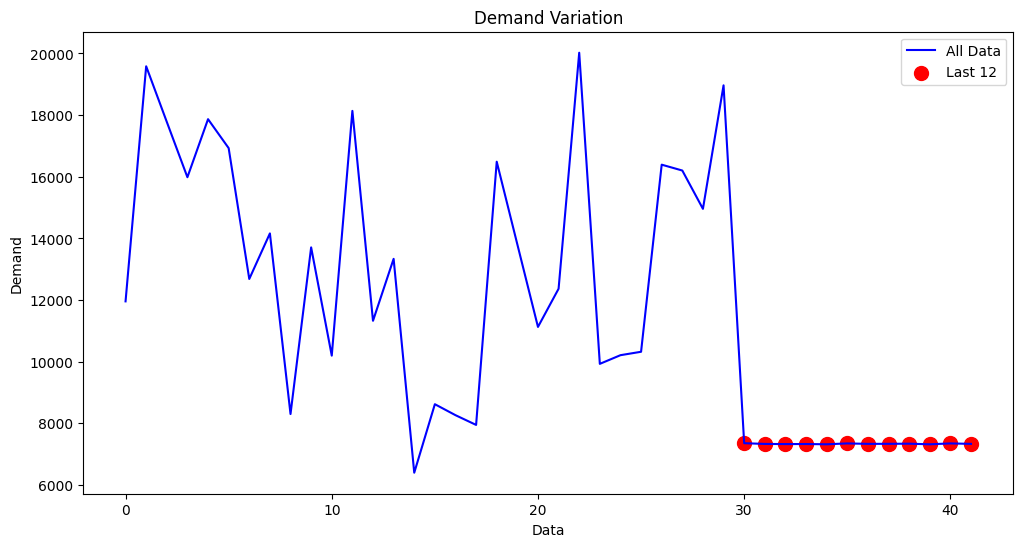

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_lstm.index, df_lstm['Demand'], label='All Data', color='blue')
plt.scatter(df_lstm.index[-12:], df_lstm['Demand'].tail(12), color='red', label='Last 12', s=100)
plt.xlabel('Data')
plt.ylabel('Demand')
plt.title('Demand Variation')
plt.legend()
plt.show()

In [ ]:
df_lstm['Percentage Change'] = df_lstm['Demand'].pct_change() * 100

tolerance = 20
increasing_trend = ((df_lstm['Percentage Change'] >= -tolerance) & (df_lstm['Percentage Change'] <= tolerance)).all()

if increasing_trend:
    print("The product has an increasing trend with a tolerance of 20%.")
else:
    print("The product has a decreasing trend with a tolerance of 20%.")

The product has a decreasing trend with a tolerance of 20%.


### LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression

df_lr = df.copy()

features = df_lr.drop(columns=['Demand'])
target = df_lr['Demand']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model_lr = LinearRegression()

model_lr.fit(X_train, y_train)

predictions = model_lr.predict(X_test)

mse = mean_squared_error(y_test, predictions)

print("Mean Squared Error:", mse)

Mean Squared Error: 19482838.189867284


In [ ]:
next_12_data = df_lr.iloc[-12:].drop(columns=['Demand'])
next_12_predictions = model_lr.predict(next_12_data)
print("Next 12 Predictions:", next_12_predictions)

Next 12 Predictions: [13309.89826875 13179.10791838 13635.71107632 13050.77579898
 13709.96433657 14099.40157246 14224.12912297 13769.65510238
 13552.14529631 13709.77985394 13400.14428657 15048.20179397]


In [ ]:
df_to_append = pd.DataFrame(columns=df_lr.columns)

df_to_append['Demand'] = next_12_predictions

for column in df_to_append.columns:
    if column != 'Demand':
        df_to_append[column] = 0

df_lr = pd.concat([df_lr, df_to_append], ignore_index=True)

In [ ]:
df_lr

,Demand,QTY_GARANTY_S,INVENTORY_QTY
0,11958.000000,473,51353
1,19585.000000,391,40055
2,17781.000000,219,16979
3,15986.000000,359,37015
4,17869.000000,237,30731
5,16930.000000,379,6488
6,12685.000000,493,7435
7,14163.000000,134,33872
8,8303.000000,475,3180
9,13709.000000,519,65296


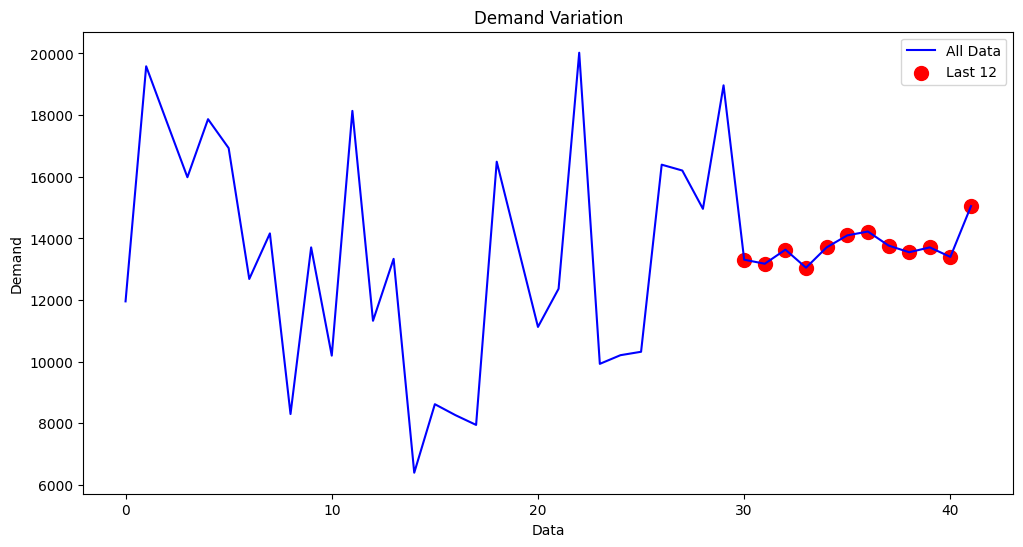

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_lr.index, df_lr['Demand'], label='All Data', color='blue')
plt.scatter(df_lr.index[-12:], df_lr['Demand'].tail(12), color='red', label='Last 12', s=100)

plt.xlabel('Data')
plt.ylabel('Demand')
plt.title('Demand Variation')
plt.legend()

plt.show()

In [ ]:
df_lr['Percentage Change'] = df_lr['Demand'].pct_change() * 100

tolerance = 20
increasing_trend = ((df_lr['Percentage Change'] >= -tolerance) & (df_lr['Percentage Change'] <= tolerance)).all()

if increasing_trend:
    print("The product has an increasing trend with a tolerance of 20%.")
else:
    print("The product has a decreasing trend with a tolerance of 20%.")

The product has a decreasing trend with a tolerance of 20%.


### SVR

In [ ]:
from sklearn.svm import SVR

df_svr = df.copy()

features = df_svr.drop(columns=['Demand'])
target = df_svr['Demand']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model_svr = SVR(kernel='linear')

model_svr.fit(X_train, y_train)

predictions = model_svr.predict(X_test)

mse = mean_squared_error(y_test, predictions)

print("Mean Squared Error:", mse)

Mean Squared Error: 29967311.163176436


In [ ]:
next_12_data = df_svr.iloc[-12:].drop(columns=['Demand'])
next_12_predictions = model_svr.predict(next_12_data)
print("Next 12 Predictions:", next_12_predictions)

Next 12 Predictions: [14299.94548767 13593.18017548 14167.81535309 13638.18275803
 15475.34782951 16361.7940728  16446.21158188 15267.73168724
 14479.97413986 14680.69260567 14760.70046204 16332.9160121 ]


In [ ]:
df_to_append = pd.DataFrame(columns=df_svr.columns)

df_to_append['Demand'] = next_12_predictions

for column in df_to_append.columns:
    if column != 'Demand':
        df_to_append[column] = 0

df_svr = pd.concat([df_svr, df_to_append], ignore_index=True)

In [ ]:
df_svr

,Demand,QTY_GARANTY_S,INVENTORY_QTY
0,11958.000000,473,51353
1,19585.000000,391,40055
2,17781.000000,219,16979
3,15986.000000,359,37015
4,17869.000000,237,30731
5,16930.000000,379,6488
6,12685.000000,493,7435
7,14163.000000,134,33872
8,8303.000000,475,3180
9,13709.000000,519,65296


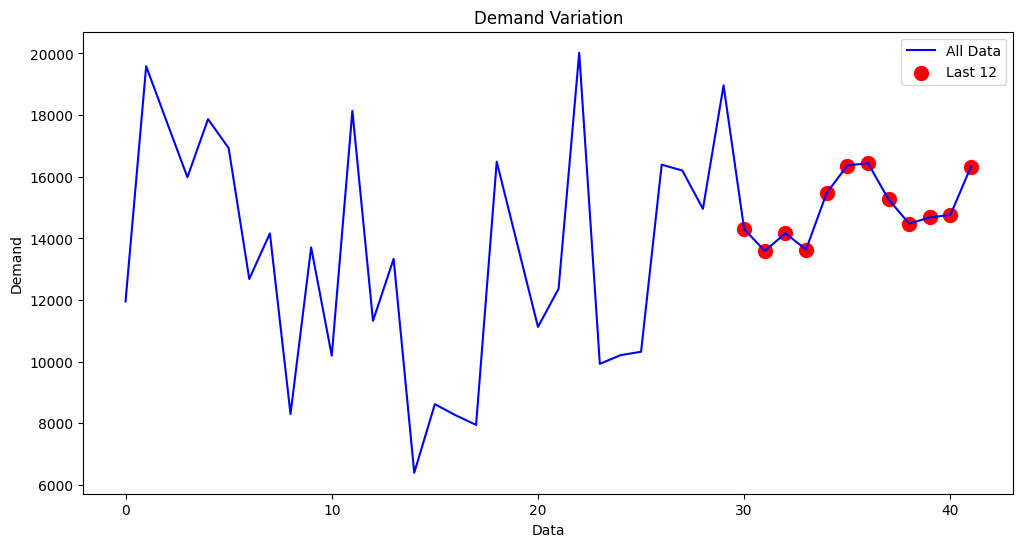

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_svr.index, df_svr['Demand'], label='All Data', color='blue')
plt.scatter(df_svr.index[-12:], df_svr['Demand'].tail(12), color='red', label='Last 12', s=100)

plt.xlabel('Data')
plt.ylabel('Demand')
plt.title('Demand Variation')
plt.legend()

plt.show()

In [ ]:
df_svr['Percentage Change'] = df_svr['Demand'].pct_change() * 100

tolerance = 20
increasing_trend = ((df_svr['Percentage Change'] >= -tolerance) & (df_svr['Percentage Change'] <= tolerance)).all()

if increasing_trend:
    print("The product has an increasing trend with a tolerance of 20%.")
else:
    print("The product has a decreasing trend with a tolerance of 20%.")

The product has a decreasing trend with a tolerance of 20%.


### DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
df_dt = df.copy()

In [ ]:
features = df_svr[['QTY_GARANTY_S', 'INVENTORY_QTY']]
target = df_svr['Demand']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model_dt = DecisionTreeRegressor()

model_dt.fit(X_train, y_train)

predictions = model_dt.predict(X_test)

mse = mean_squared_error(y_test, predictions)

print("Mean Squared Error:", mse)

Mean Squared Error: 12581571.48569082


In [ ]:
next_12_data = df_dt.iloc[-12:].drop(columns=['Demand'])
next_12_predictions = model_dt.predict(next_12_data)
print("Next 12 Predictions:", next_12_predictions)

Next 12 Predictions: [16489. 16203. 11129. 12368. 20025.  9931. 10212. 14960. 16203. 16203.
 14960. 12685.]


In [ ]:
df_to_append = pd.DataFrame(columns=df_dt.columns)

df_to_append['Demand'] = next_12_predictions

for column in df_to_append.columns:
    if column != 'Demand':
        df_to_append[column] = 0

df_dt = pd.concat([df_dt, df_to_append], ignore_index=True)

In [ ]:
df_dt

,Demand,QTY_GARANTY_S,INVENTORY_QTY
0,11958.00,473,51353
1,19585.00,391,40055
2,17781.00,219,16979
3,15986.00,359,37015
4,17869.00,237,30731
5,16930.00,379,6488
6,12685.00,493,7435
7,14163.00,134,33872
8,8303.00,475,3180
9,13709.00,519,65296


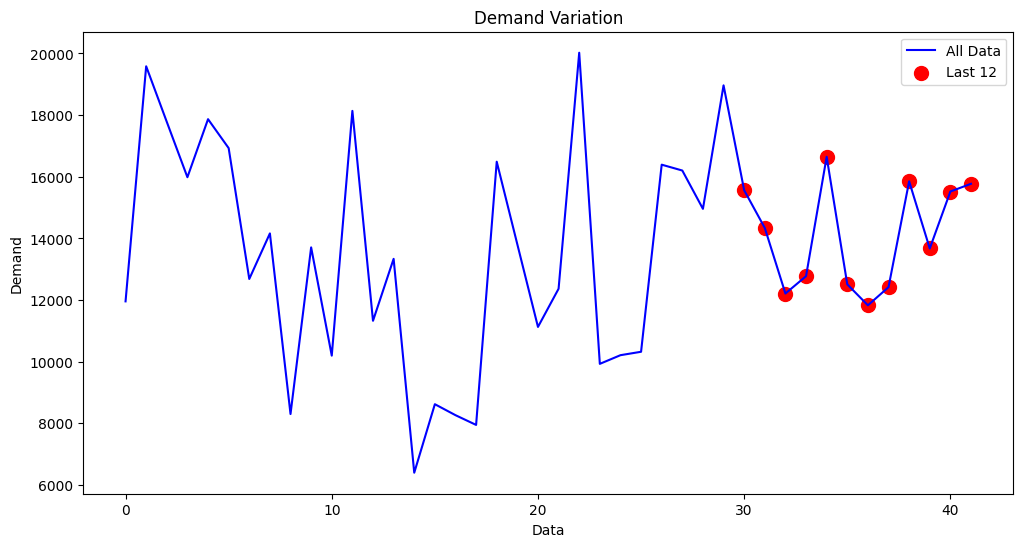

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_dt.index, df_dt['Demand'], label='All Data', color='blue')
plt.scatter(df_dt.index[-12:], df_dt['Demand'].tail(12), color='red', label='Last 12', s=100)

plt.xlabel('Data')
plt.ylabel('Demand')
plt.title('Demand Variation')
plt.legend()

plt.show()

In [ ]:
df_dt['Percentage Change'] = df_dt['Demand'].pct_change() * 100

tolerance = 20
increasing_trend = ((df_dt['Percentage Change'] >= -tolerance) & (df_dt['Percentage Change'] <= tolerance)).all()

if increasing_trend:
    print("The product has an increasing trend with a tolerance of 20%.")
else:
    print("The product has a decreasing trend with a tolerance of 20%.")

The product has a decreasing trend with a tolerance of 20%.


### RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df_rf = df.copy()

In [ ]:


features = df_rf.drop(columns=['Demand'])
target = df_rf['Demand']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model_rf = RandomForestRegressor()

model_rf.fit(X_train, y_train)

predictions = model_rf.predict(X_test)

mse = mean_squared_error(y_test, predictions)

print("Mean Squared Error:", mse)

Mean Squared Error: 11236849.033483334


In [ ]:
next_12_data = df_rf.iloc[-12:].drop(columns=['Demand'])
next_12_predictions = model_rf.predict(next_12_data)
print("Next 12 Predictions:", next_12_predictions)

Next 12 Predictions: [15563.02 14339.73 12212.98 12775.06 16647.95 12510.31 11830.51 12419.37
 15852.19 13673.51 15522.31 15772.86]


In [ ]:
df_to_append = pd.DataFrame(columns=df_rf.columns)

df_to_append['Demand'] = next_12_predictions

for column in df_to_append.columns:
    if column != 'Demand':
        df_to_append[column] = 0

df_rf = pd.concat([df_rf, df_to_append], ignore_index=True)

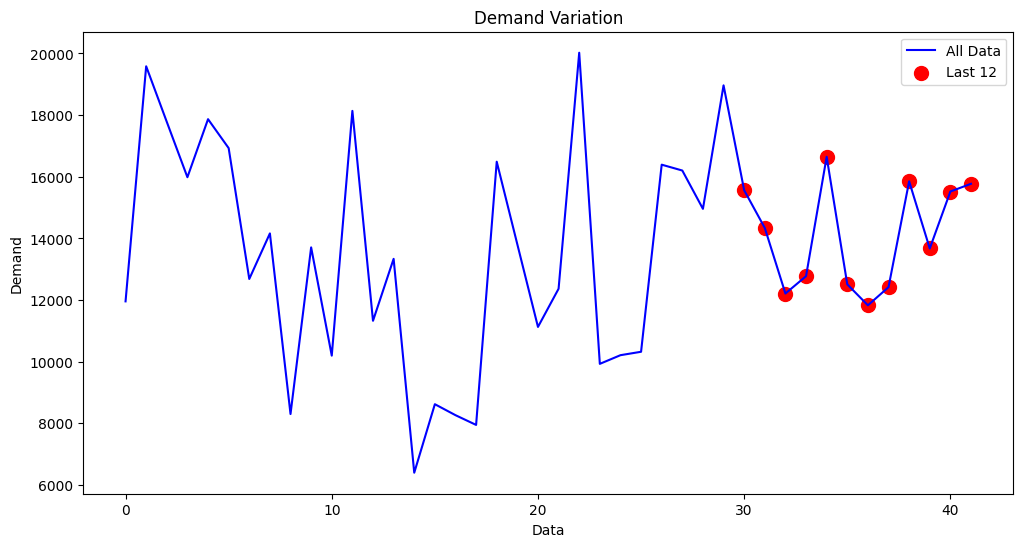

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_rf.index, df_rf['Demand'], label='All Data', color='blue')
plt.scatter(df_rf.index[-12:], df_rf['Demand'].tail(12), color='red', label='Last 12', s=100)

plt.xlabel('Data')
plt.ylabel('Demand')
plt.title('Demand Variation')
plt.legend()

plt.show()

In [ ]:
df_rf['Percentage Change'] = df_rf['Demand'].pct_change() * 100

tolerance = 20
increasing_trend = ((df_rf['Percentage Change'] >= -tolerance) & (df_rf['Percentage Change'] <= tolerance)).all()

if increasing_trend:
    print("The product has an increasing trend with a tolerance of 20%.")
else:
    print("The product has a decreasing trend with a tolerance of 20%.")

The product has a decreasing trend with a tolerance of 20%.
